<a href="https://colab.research.google.com/github/plaban1981/stable_diffusion/blob/main/Stable_Diffusion_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stable Diffusion during inference

Stable Diffusion is based on a particular type of diffusion model called **Latent Diffusion**, proposed in [High-Resolution Image Synthesis with Latent Diffusion Models](https://arxiv.org/abs/2112.10752).

* Generally speaking, diffusion models are machine learning systems that are trained to denoise random Gaussian noise step by step, to get to a sample of interest, such as an image.

#### There are three main components in latent diffusion.

* An autoencoder (VAE).
* A U-Net.
* A text-encoder, e.g. CLIP's Text Encoder.



1. The autoencoder (VAE)

The VAE model has two parts, an encoder and a decoder. The encoder is used to convert the image into a low dimensional latent representation, which will serve as the input to the U-Net model. The decoder, conversely, transforms the latent representation back into an image.

During latent diffusion training, the encoder is used to get the latent representations (latents) of the images for the forward diffusion process, which applies more and more noise at each step. During inference, the denoised latents generated by the reverse diffusion process are converted back into images using the VAE decoder. As we will see during inference we only need the VAE decoder.

2. The U-Net

The U-Net has an encoder part and a decoder part both comprised of ResNet blocks. The encoder compresses an image representation into a lower resolution image representation and the decoder decodes the lower resolution image representation back to the original higher resolution image representation that is supposedly less noisy. More specifically, the U-Net output predicts the noise residual which can be used to compute the predicted denoised image representation.

To prevent the U-Net from losing important information while downsampling, short-cut connections are usually added between the downsampling ResNets of the encoder to the upsampling ResNets of the decoder. Additionally, the stable diffusion U-Net is able to condition its output on text-embeddings via cross-attention layers. The cross-attention layers are added to both the encoder and decoder part of the U-Net usually between ResNet blocks.

3. The Text-encoder

The text-encoder is responsible for transforming the input prompt, e.g. "An astronaut riding a horse" into an embedding space that can be understood by the U-Net. It is usually a simple transformer-based encoder that maps a sequence of input tokens to a sequence of latent text-embeddings.

Inspired by Imagen, Stable Diffusion does not train the text-encoder during training and simply uses an CLIP's already trained text encoder, CLIPTextModel.

![](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/stable_diffusion.png)

## Install Required packages

In [1]:
!pip install diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 16.7 MB/s eta 0:00:00


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 116.0 MB/s eta 0:00:00


In [9]:
! pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 7.5 MB/s eta 0:00:00


#### **Note:** If you are limited by GPU memory and have less than 10GB of GPU RAM available, please make sure to load the StableDiffusionPipeline in float16 precision instead of the default float32 precision.



In [3]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a dog wearing a cap"
image = pipe(prompt).images[0]  
    
image.save("astronaut_rides_horse.png")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


  0%|          | 0/50 [00:00<?, ?it/s]

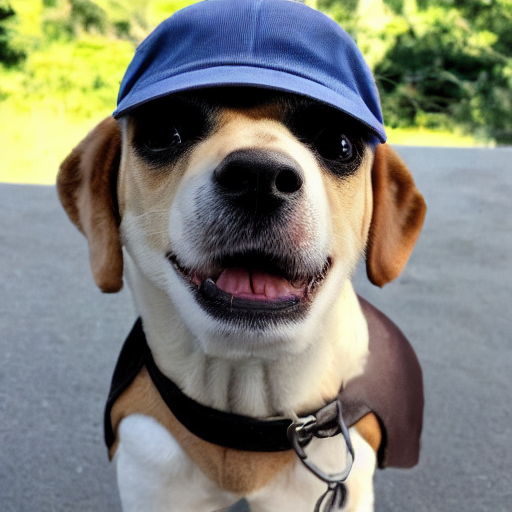

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("astronaut_rides_horse.png")
cv2_imshow(image)

## Save The diifusion Model

In [4]:
pipe.save_pretrained('stable-diffusion-v1')

## Load the saved model

In [10]:
model_id = "/content/stable-diffusion-v1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "A photo of baby girl sleeping inside a flower basket"
image = pipe(prompt).images[0]  
    
image.save("babygirl.png")


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


  0%|          | 0/50 [00:00<?, ?it/s]

## Visualize the image generated

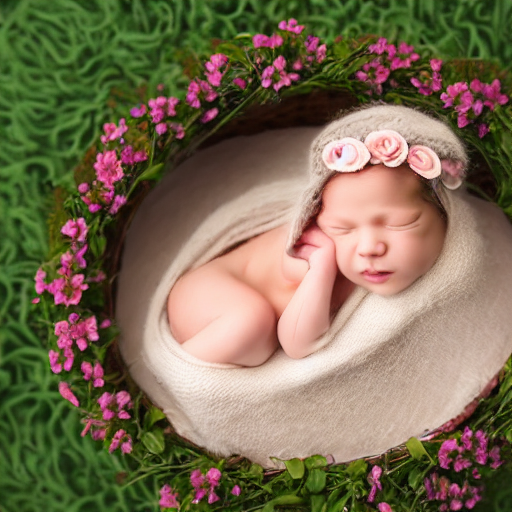

In [11]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/babygirl.png")
cv2_imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

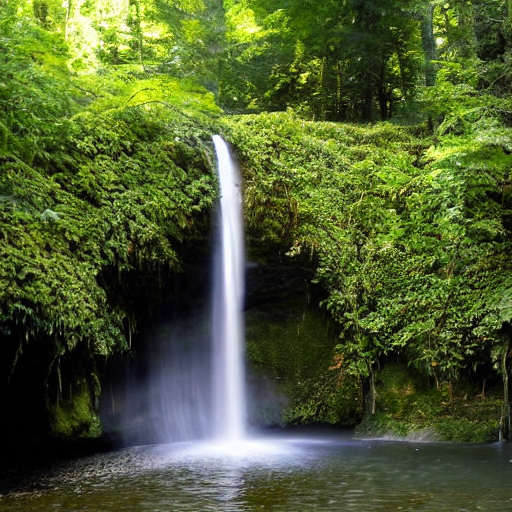

In [12]:
from IPython.display import Image
prompt = "A sceneic photo of waterfalls in a "
image = pipe(prompt).images[0]  
#   
image.save("waterfall.png")
Image("waterfall.png")

#### When choosing image sizes, we advise the following:

* Make sure height and width are both multiples of 8.
* Going below 512 might result in lower quality images.
* Going over 512 in both directions will repeat image areas (global coherence is lost).
* The best way to create non-square images is to use 512 in one dimension, and a value larger than that in the other one.

  0%|          | 0/50 [00:00<?, ?it/s]

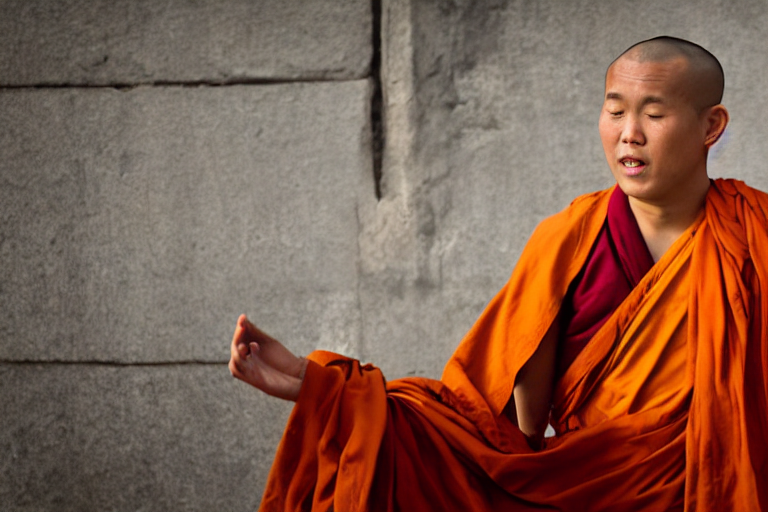

In [13]:
prompt = "a photograph of a buddhist monk"
image = pipe(prompt, height=512, width=768).images[0]
image.save("monk.png")
Image("monk.png")

#### Number of inference steps

* the default number of inference steps is 50.
* we can change the number of inference steps using the num_inference_steps argument.
* results are better the more steps you use, however the more steps, the longer the generation takes. 
* Stable Diffusion works quite well with a relatively small number of steps, so we recommend to use the default number of inference steps of 50. 
* If we  want faster results you can use a smaller number. 
* If you want potentially higher quality results, you can use larger numbers.

## guidance scale

* guidance_scale is a way to increase the adherence to the conditional signal that guides the generation (text, in this case) as well as overall sample quality. 

* It forces the generation to better match the prompt potentially at the cost of image quality or diversity. 
* Values between 7 and 8.5 are usually good choices for Stable Diffusion. 
* By default the pipeline uses a guidance_scale of **7.5**.

  0%|          | 0/55 [00:00<?, ?it/s]

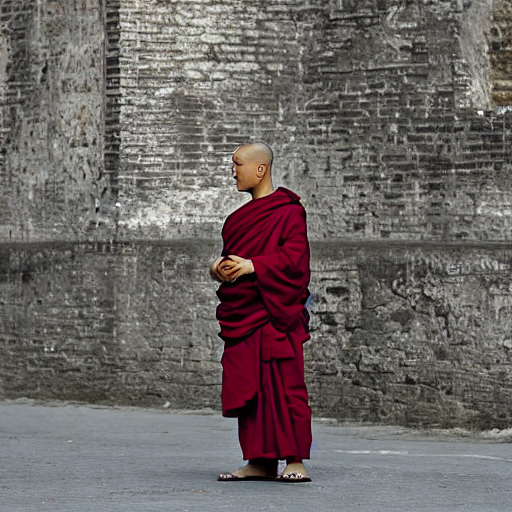

In [14]:
import torch

generator = torch.Generator("cuda").manual_seed(1024)
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=55,generator=generator).images[0]
image.save("monk1.png")
Image("monk1.png")

  0%|          | 0/200 [00:00<?, ?it/s]

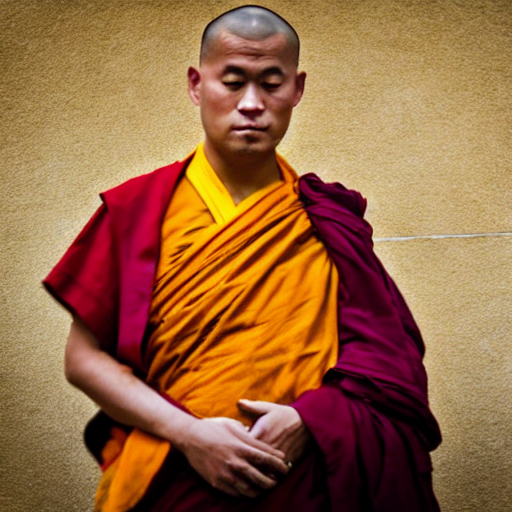

In [16]:
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=200,generator=generator).images[0]
image.save("monk1.png")
Image("monk1.png")

  0%|          | 0/50 [00:00<?, ?it/s]

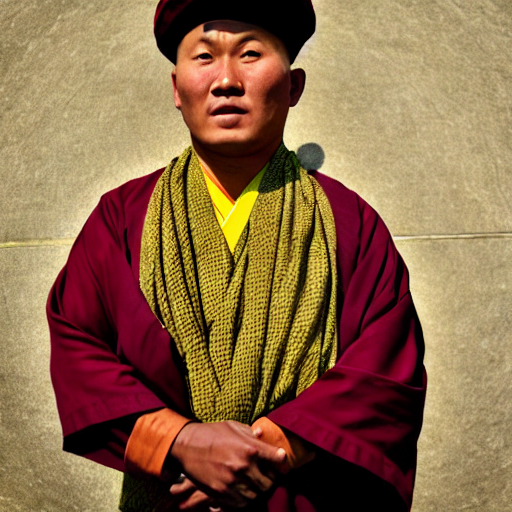

In [ ]:
image = pipe(prompt,generator=generator).images[0]
image.save("monk1.png")
Image("monk1.png")

* If you use a very large guidance_scale value the images might look good, but will be less diverse.

  0%|          | 0/55 [00:00<?, ?it/s]

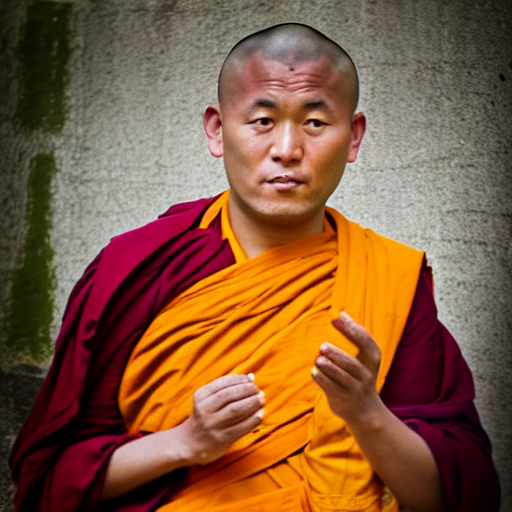

In [19]:
image = pipe(prompt, guidance_scale=12.0, num_inference_steps=55,generator=generator).images[0]
image.save("monk1.png")
Image("monk1.png")

In [ ]:
prompt = "a picture of dolphin swimming in the sea"
image = pipe(prompt).images[0]  
    
image.save("dolphin.png")

  0%|          | 0/50 [00:00<?, ?it/s]

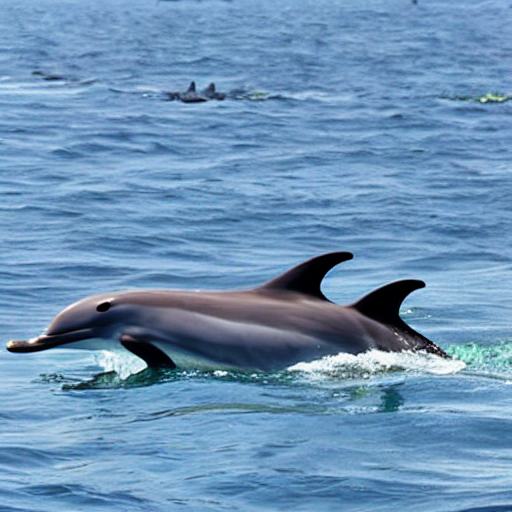

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("astronaut_rides_horse.png")
cv2_imshow(image)

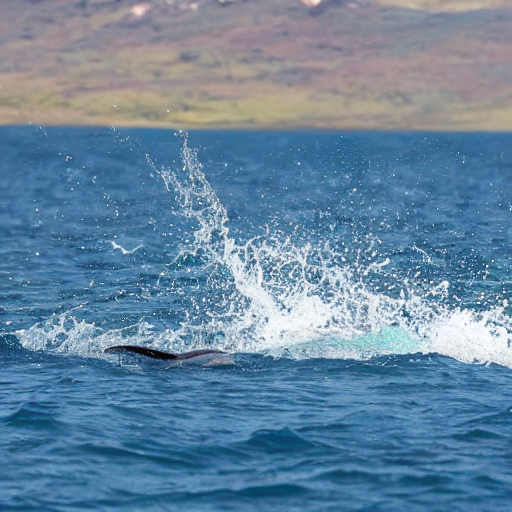

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("dolphin.png")
cv2_imshow(image)

#### If you want deterministic output you can seed a random seed and pass a generator to the pipeline. Every time you use a generator with the same seed you'll get the same image output.

  0%|          | 0/50 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7EFC89FB6700>], nsfw_content_detected=[False])


  0%|          | 0/50 [00:00<?, ?it/s]

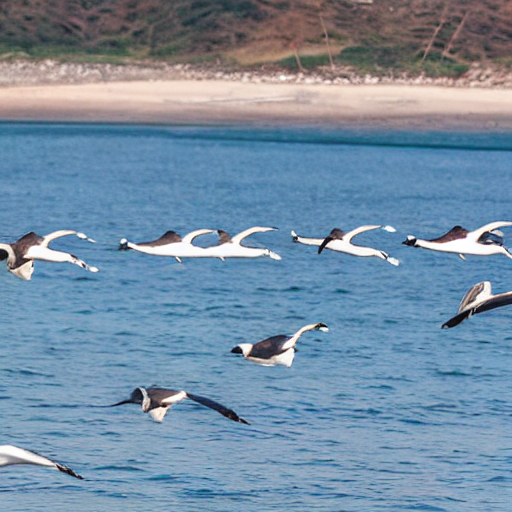

In [ ]:
import torch
import cv2
from google.colab.patches import cv2_imshow
prompt = "a group of segull flying across the sea beach"
generator = torch.Generator("cuda").manual_seed(1024)
print(pipe(prompt, generator=generator))
image = pipe(prompt, generator=generator).images[0]

# you can save the image with
image.save(f"whale.png")
#
image = cv2.imread("whale.png")
cv2_imshow(image)

## Define a function to help us visualize the images in a grid.

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

#### Generate multiple images for the same prompt by simply using a list with the same prompt repeated several times. 

* We'll send the list to the pipeline instead of the string we used before.

In [ ]:
num_images = 3
prompt = ["a picture of dolphin swimming in the sea"] * num_images

images = pipe(prompt).images

grid = image_grid(images, rows=1, cols=3)

  0%|          | 0/50 [00:00<?, ?it/s]

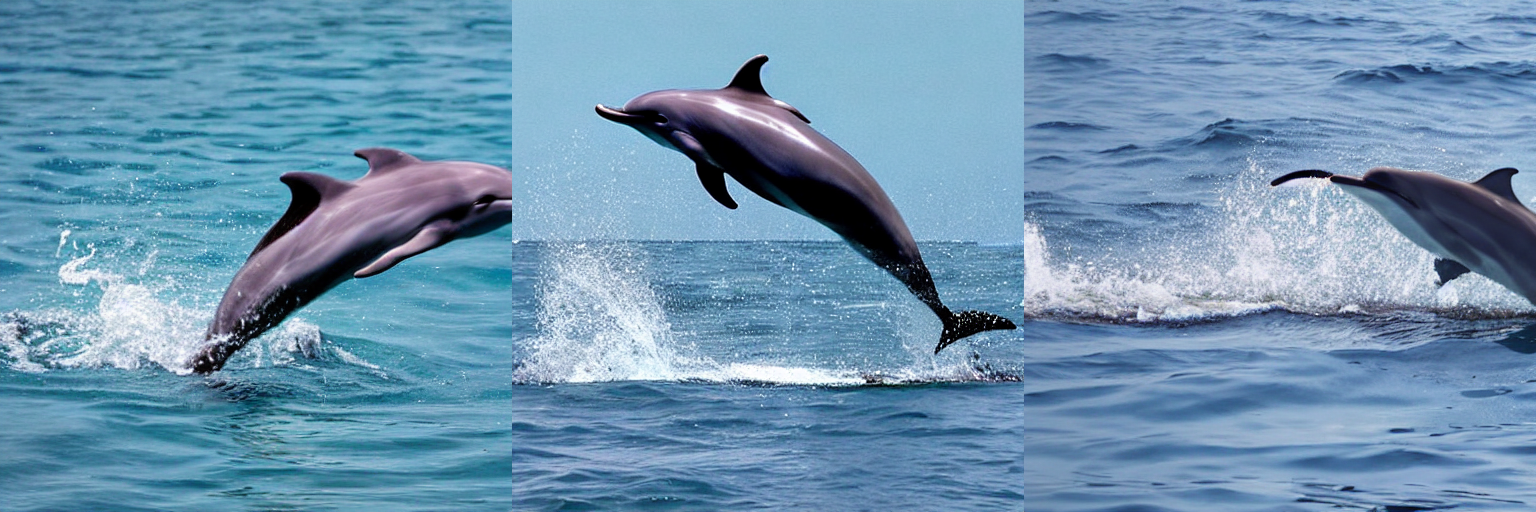

In [ ]:
grid